In [ ]:
# !unzip /content/drive/MyDrive/BTL/archive.zip

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Input
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/btl/')

In [ ]:
#Xác định một số tham số
batch_size = 32
img_height = 48
img_width = 48

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12045 files belonging to 2 classes.
Using 9636 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12045 files belonging to 2 classes.
Using 2409 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['happy', 'sad']


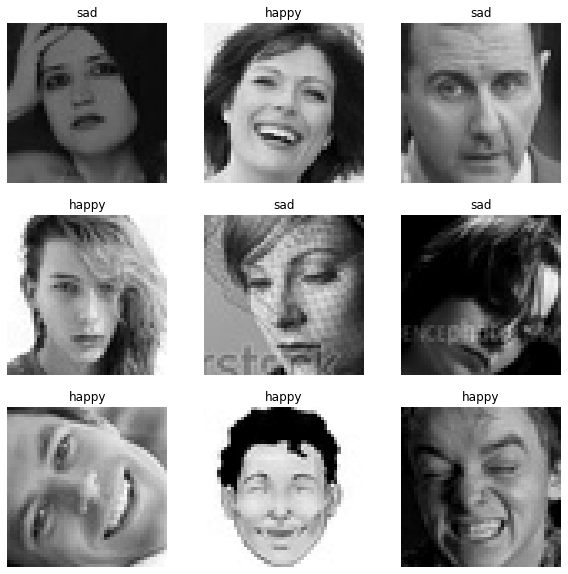

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 48, 48, 3)
(32,)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

#chuẩn hóa các giá trị nằm trong phạm vi [0, 1]
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
print(normalized_ds)
image_batch, labels_batch = next(iter(normalized_ds))
print(image_batch)
print(labels_batch)
first_image = image_batch[0]
# Notice the pixels values are now in [0,1].
print(np.min(first_image), np.max(first_image))

<MapDataset shapes: ((None, 48, 48, 3), (None,)), types: (tf.float32, tf.int32)>
tf.Tensor(
[[[[0.23137257 0.23137257 0.23137257]
   [0.01176471 0.01176471 0.01176471]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.07843138 0.07843138 0.07843138]
   [0.08235294 0.08235294 0.08235294]
   [0.07450981 0.07450981 0.07450981]]

  [[0.01176471 0.01176471 0.01176471]
   [0.         0.         0.        ]
   [0.01960784 0.01960784 0.01960784]
   ...
   [0.07450981 0.07450981 0.07450981]
   [0.07843138 0.07843138 0.07843138]
   [0.07450981 0.07450981 0.07450981]]

  [[0.         0.         0.        ]
   [0.01960784 0.01960784 0.01960784]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.07450981 0.07450981 0.07450981]
   [0.08627451 0.08627451 0.08627451]
   [0.08235294 0.08235294 0.08235294]]

  ...

  [[0.09803922 0.09803922 0.09803922]
   [0.15686275 0.15686275 0.15686275]
   [0.21568629 0.21568629 0.21568629]
   ...
   [0.89019614 0.89019614 0.89019614]
   [0.89019614 0.89019614 0.890

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
from keras.losses import categorical_crossentropy  

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [ ]:
epochs=50
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


302/302 [==============================] - 7s 10ms/step - loss: 0.6487 - accuracy: 0.6239 - val_loss: 0.5793 - val_accuracy: 0.6833
Epoch 2/50
302/302 [==============================] - 2s 7ms/step - loss: 0.5253 - accuracy: 0.7380 - val_loss: 0.5098 - val_accuracy: 0.7393
Epoch 3/50
302/302 [==============================] - 2s 7ms/step - loss: 0.4566 - accuracy: 0.7808 - val_loss: 0.4731 - val_accuracy: 0.7796
Epoch 4/50
302/302 [==============================] - 2s 7ms/step - loss: 0.4045 - accuracy: 0.8143 - val_loss: 0.4158 - val_accuracy: 0.8028
Epoch 5/50
302/302 [==============================] - 2s 7ms/step - loss: 0.3583 - accuracy: 0.8354 - val_loss: 0.3954 - val_accuracy: 0.8194
Epoch 6/50
302/302 [==============================] - 2s 7ms/step - loss: 0.3257 - accuracy: 0.8510 - val_loss: 0.3811 - val_accuracy: 0.8290
Epoch 7/50
302/302 [==============================] - 2s 7ms/step - loss: 0.2922 - accuracy: 0.8704 - val_loss: 0.3705 - val_accuracy: 0.8398
Epoch 8/50
302/3

In [ ]:
# model.save('modeldone2class.h5')

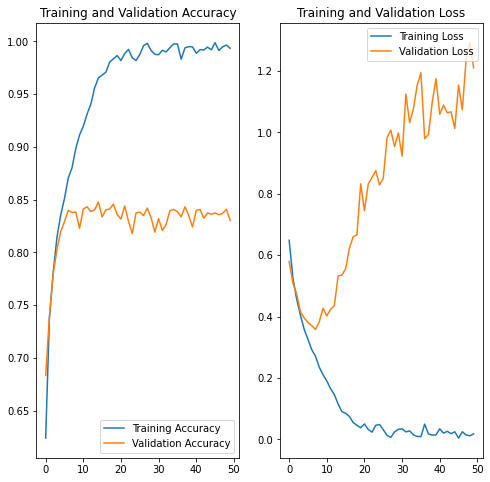

In [ ]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

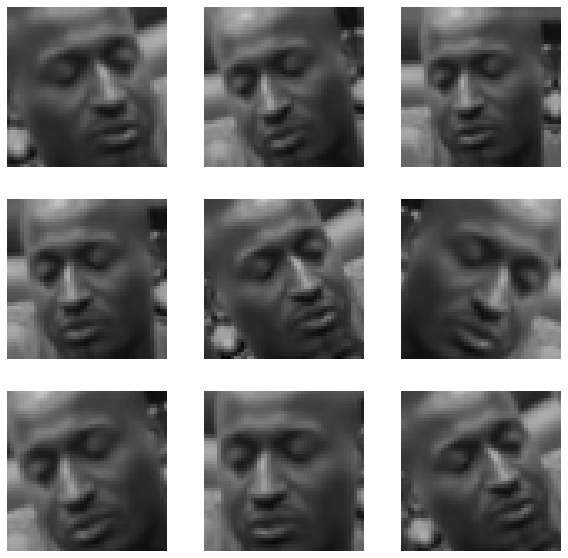

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 48, 48, 3)         0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [ ]:
epochs = 200
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/200
302/302 [==============================] - 4s 10ms/step - loss: 0.6566 - accuracy: 0.6145 - val_loss: 0.6128 - val_accuracy: 0.6617
Epoch 2/200
302/302 [==============================] - 3s 10ms/step - loss: 0.6087 - accuracy: 0.6670 - val_loss: 0.5471 - val_accuracy: 0.7206
Epoch 3/200
302/302 [==============================] - 3s 10ms/step - loss: 0.5708 - accuracy: 0.7042 - val_loss: 0.5363 - val_accuracy: 0.7240
Epoch 4/200
302/302 [==============================] - 3s 10ms/step - loss: 0.5408 - accuracy: 0.7209 - val_loss: 0.5109 - val_accuracy: 0.7310
Epoch 5/200
302/302 [==============================] - 3s 10ms/step - loss: 0.5199 - accuracy: 0.7372 - val_loss: 0.4698 - val_accuracy: 0.7704
Epoch 6/200
302/302 [==============================] - 3s 10ms/step - loss: 0.4915 - accuracy: 0.7469 - val_loss: 0.4496 - val_accuracy: 0.7796
Epoch 7/200
302/302 [==============================] - 3s 10ms/step - loss: 0.4751 - accuracy: 0.7662 - val_loss: 0.4370 - val_accuracy:

In [ ]:
model.save('modeldone5class200epoch.h5')

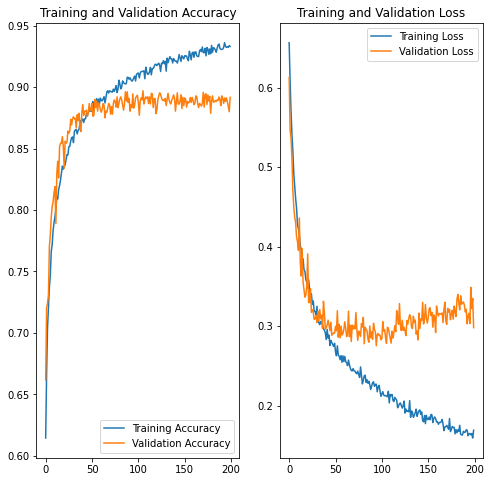

In [ ]:
epochs = 200
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()